In [1]:
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import Model
from sklearn.metrics.pairwise import euclidean_distances
from keras.applications.xception import Xception
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from keras.models import Sequential, Model,load_model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras import applications
from keras import optimizers
import matplotlib.image as mpimg
from sklearn.neighbors import NearestNeighbors
import math
import operator
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
model = load_model('/Users/Minmin/Downloads/vgg16_clothing_classifier_0905_all.h5')

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
model2 = Model(input=model.input, output=model.get_layer('fc2').output)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`
  """Entry point for launching an IPython kernel.


In [8]:
df=pd.read_pickle('../styleflask/models/dress_features.pickle')
#df.set_index('product_id',inplace=True)
df.shape

(5049, 4096)

In [5]:
#df_v=df.iloc[:,1:-1]

In [ ]:
cos_top=NearestNeighbors(n_neighbors=5,metric='cosine').fit(df_v)
distances_cos, indices_cos=cos_top.kneighbors(df_v)

In [187]:
Data_cos = pd.DataFrame(np.array(df.index[indices_cos]))
Data_cos.head(2)

,0,1,2,3,4,5
0,218767164,529680046,642173025,624312528,511023862,720319706
1,432120874,460701466,644109814,713172553,694273243,718067226
2,433918010,707584382,518418370,701997259,708256086,702780536
3,434741392,488717031,712618134,734336576,706120583,728138467
4,437105639,740123408,694656390,732434820,676555039,735687943
5,443526341,737437254,736644804,736064811,712379782,722317350
6,446985336,735693815,642390025,721848365,694888103,725774437
7,453829187,729594450,737987860,732706683,723909549,724243446
8,454127444,733625639,727058633,720615050,688395840,716646469
9,455310119,455310119,738758129,716970528,732579628,733383745


In [209]:
meta=pd.read_pickle('metadata/train_meta/dress.pickle')
meta=pd.DataFrame(meta)
meta['final_price']=0
meta.loc[meta['saleprice'] != None,'final_price']=meta['saleprice']
meta['final_price']=meta['final_price'].fillna(0)
meta.loc[meta['final_price'] == 0,'final_price']=meta['price']
meta.head()

,categories,id,image_url,parent_category,price,product_name,saleprice,final_price
0,[day-dresses],642632776,https://img.shopstyle-cdn.com/pim/cc/00/cc0081...,dress,$128,Eliza J Belted Fit & Flare Dress,$76.80,$76.80
1,[evening-dresses],715586211,https://img.shopstyle-cdn.com/pim/e4/0a/e40a81...,dress,$179,Adrianna Papell Embellished Bodice Gown,$93.98,$93.98
2,[day-dresses],455310119,https://img.shopstyle-cdn.com/pim/34/a7/34a79f...,dress,$56,Leith Ruched Body-Con Tank Dress,None,$56
3,[cocktail-dresses],618768677,https://img.shopstyle-cdn.com/pim/96/c9/96c991...,dress,$149,Chelsea28 Asymmetrical Ruffle Shift Dress,$89.40,$89.40
4,[dresses],726468162,https://img.shopstyle-cdn.com/pim/1e/22/1e222d...,dress,$49.50,"Maison Jules Ruffled-Hem Striped A-Line Dress,...",$37.12,$37.12


In [12]:
meta_test=pd.read_pickle('metadata/test_meta/tops_test.pickle')
meta_test=pd.DataFrame(meta_test)
meta_test['final_price']=0
meta_test.loc[meta_test['saleprice'] != None,'final_price']=meta_test['saleprice']
meta_test['final_price']=meta_test['final_price'].fillna(0)
meta_test.loc[meta_test['final_price'] == 0,'final_price']=meta_test['price']
meta_test.head()

,categories,id,image_url,parent_category,price,product_name,saleprice,final_price
0,"[plus-size-tops, womens-tops]",692156409,https://img.shopstyle-cdn.com/pim/73/dc/73dc2d...,tops,$69,City Chic Plus Off-the-Shoulder Bell Sleeve Top,None,$69
1,[tees-and-tshirts],693359518,https://img.shopstyle-cdn.com/pim/26/a4/26a436...,tops,$156,Comme des Garcons PLAY Stripe Cotton Tee,None,$156
2,"[petite-tops, longsleeve-tops, tees-and-tshirts]",673521436,https://img.shopstyle-cdn.com/pim/ae/14/ae1480...,tops,$128,Eileen Fisher Silk Tee,$89.60,$89.60
3,"[sweaters, womens-tops]",651716636,https://img.shopstyle-cdn.com/pim/4a/9e/4a9e04...,tops,$130,Barefoot Dreams(R) Barefoot Dreams Cozychic Ul...,None,$130
4,[button-front-tops],734154784,https://img.shopstyle-cdn.com/pim/04/93/049353...,tops,$148,Rails Hunter Plaid Shirt,$88.80,$88.80


In [13]:
def find_price(img_id):
    price=meta.loc[meta['id']==img_id,'final_price'].values[0]
    return price

def find_price_test(img_id):
    price=meta_test.loc[meta_test['id']==img_id,'price'].values[0]
    return price

In [340]:
def plot_tops(indices):
    plt.figure(figsize=[10,10])

    plt.subplot(2,2,1)
    #im=mpimg.imread('data/test/tops/467117452.jpg')
    im = mpimg.imread('data/train/dress/'+str(Data_cos.iloc[indices].values.reshape(1,-1)[0][0])+'.jpg')
    plt.imshow(im)
    #plt.title('Original - '+ find_price(Data_cos.iloc[indices].values.reshape(1,-1)[0][0]))
    #plt.title('Original - '+ find_price_test(467117452))
    plt.axis('off')

    plt.subplot(2,2,2)
    im = mpimg.imread('data/train/dress/'+str(Data_cos.iloc[indices].values.reshape(1,-1)[0][1])+'.jpg')
    #im = mpimg.imread('data/train/tops/'+str(df.index[indices[0]])+'.jpg')
    plt.imshow(im);
    #plt.title('Recommendation 1 - '+ find_price(Data_cos.iloc[indices].values.reshape(1,-1)[0][1]))
    #plt.title('Recommendation 1 - '+ find_price(df.index[indices[0]]))
    plt.axis('off')

    plt.subplot(2,2,3)
    im = mpimg.imread('data/train/dress/'+str(Data_cos.iloc[indices].values.reshape(1,-1)[0][2])+'.jpg')
    plt.imshow(im);
    #plt.title('Recommendation 2 - '+ find_price(Data_cos.iloc[indices].values.reshape(1,-1)[0][2]))
    plt.axis('off')

    plt.subplot(2,2,4)
    im = mpimg.imread('data/train/dress/'+str(Data_cos.iloc[indices].values.reshape(1,-1)[0][3])+'.jpg')
    plt.imshow(im);
    #plt.title('Recommendation 3 - '+ find_price(Data_cos.iloc[indices].values.reshape(1,-1)[0][3]))
    plt.axis('off');

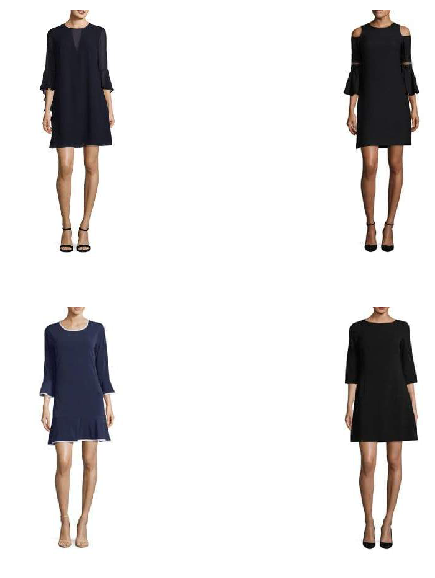

In [342]:
plot_tops(456)

## new input image

In [334]:
category_list=!ls data/train
df_meta=pd.DataFrame()
for i in category_list:
    meta=pd.read_pickle('metadata/train_meta/'+i+'.pickle')
    meta=pd.DataFrame(meta)
    meta['final_price']=meta['saleprice']
    meta['final_price']=meta['final_price'].fillna(0)
    meta.loc[meta['final_price'] == 0,'final_price']=meta['price']
    df_meta=pd.concat([df_meta,meta],ignore_index=True)

In [327]:
a = pd.read_pickle('metadata/train_meta/pants.pickle')
b = pd.read_pickle("extra_pants.pickle")
c=a+b
import pickle
pickle.dump(c, open('pants.pickle', 'wb'))

In [335]:
category_list_test=!ls data/test
df_meta_test=pd.DataFrame()
for i in category_list_test:
    meta_t=pd.read_pickle('metadata/test_meta/'+i+'_test.pickle')
    meta_t=pd.DataFrame(meta_t)
    meta_t['final_price']=meta_t['saleprice']
    meta_t['final_price']=meta_t['final_price'].fillna(0)
    meta_t.loc[meta_t['final_price'] == 0,'final_price']=meta_t['price']
    df_meta_test=pd.concat([df_meta_test,meta_t],ignore_index=True)

In [237]:
def image_preprocess(img_file):
    img = imread(img_file)
    img = resize(img, (224, 224), preserve_range=True).astype(np.float32)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

In [247]:
def find_alt(image_path):
    a=image_preprocess(image_path)
    av = model2.predict(a)
    dist = cosine_distances(av, np.array(df_v))[0]
    com=dict(zip(df_v.index,dist))
    ids=sorted(com, key=com.get)
    result=ids[:6]
    return result

In [224]:
def find_info(imgid):
    category=df_meta.loc[df_meta['id']==imgid,'parent_category'].values[0]
    img_path='data/train/'+category+'/'+str(imgid)+'.jpg'
    price=df_meta.loc[df_meta['id']==imgid,'final_price'].values[0]
    link=df_meta.loc[df_meta['id']==imgid,'url'].values[0]
    return [img_path,price]

In [232]:
def find_info_test(image_path):
    #category=df_meta.loc[df_meta['id']==imgid_test,'parent_category'].values[0]
    #img_path='data/test/'+category+'/'+str(imgid_test)+'.jpg'
    imgid_test=int(image_path.split('.')[0].split('/')[-1])
    price=df_meta_test.loc[df_meta_test['id']==imgid_test,'final_price'].values[0]
    return price

In [258]:
result=find_alt('data/test/dress/699789413.jpg')

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [259]:
result

[738185015, 730183372, 725812172, 701905929, 727058947, 731556012]

In [344]:
def plot_alt(image_path):
    plt.figure(figsize=[10,10])

    plt.subplot(2,3,1)
    im = mpimg.imread(image_path)
    plt.imshow(im)
    plt.axis('off')
    #plt.title('Input - '+ find_info_test(image_path))
    
    result=find_alt(image_path)

    plt.subplot(2,3,2)
    info=find_info(result[0])
    im = mpimg.imread(info[0])
    plt.imshow(im)
    plt.title('Recommendation 1 - '+ info[1])
    plt.axis('off');

    plt.subplot(2,3,3)
    info=find_info(result[1])
    im = mpimg.imread(info[0])
    plt.imshow(im)
    plt.title('Recommendation 2 - '+ info[1])
    plt.axis('off');

    plt.subplot(2,3,4)
    info=find_info(result[2])
    im = mpimg.imread(info[0])
    plt.imshow(im)
    plt.title('Recommendation 3 - '+ info[1])
    plt.axis('off');



    plt.subplot(2,3,5)
    info=find_info(result[3])
    im = mpimg.imread(info[0])
    plt.imshow(im)
    plt.title('Recommendation 14 - '+ info[1])
    plt.axis('off');



In [345]:
result=find_alt('data/test/dress/700902919.jpg')

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [287]:
result

[700902919, 714390666, 727597816, 529680046, 712010861, 712235672]

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


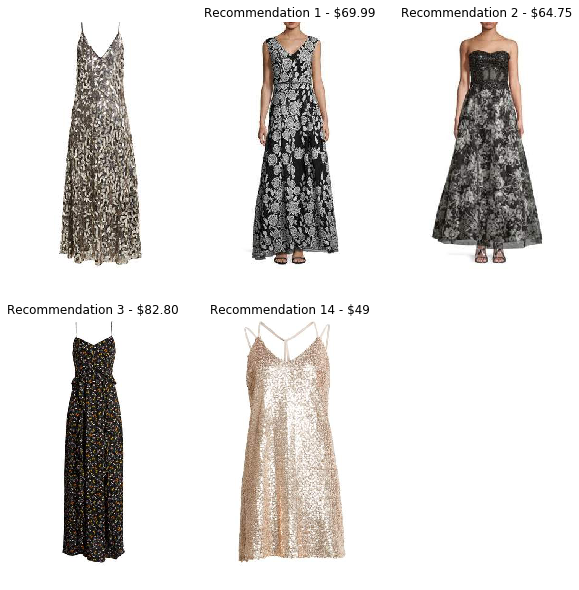

In [346]:
plot_alt('try2.jpg')

In [10]:
meta=pd.read_pickle('../styleflask/models/df_meta.pickle')

In [14]:
meta['image_url']

'https://img.shopstyle-cdn.com/pim/23/0f/230fa7269ab0a73efd6bf109e046a0de_best.jpg'